In [ ]:
# Computing Libaries
import numpy as np
import pandas as pd

# Ploting Libaries
import matplotlib.pyplot as plt
import seaborn as sns

# Pre Proccessing Modules
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/train_qWM28Yl (1).csv' )
df.head()


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


## Basic Commands

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22229 entries, 0 to 22228
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         22229 non-null  object 
 1   policy_tenure                     22229 non-null  float64
 2   age_of_car                        22229 non-null  float64
 3   age_of_policyholder               22229 non-null  float64
 4   area_cluster                      22229 non-null  object 
 5   population_density                22229 non-null  int64  
 6   make                              22229 non-null  int64  
 7   segment                           22229 non-null  object 
 8   model                             22229 non-null  object 
 9   fuel_type                         22229 non-null  object 
 10  max_torque                        22229 non-null  object 
 11  max_power                         22228 non-null  object 
 12  engi

In [ ]:
df.tail()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
22224,ID22225,0.045510,0.14,0.403846,C8,8794,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.0,0.0
22225,ID22226,0.483000,0.02,0.326923,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0.0,0.0
22226,ID22227,1.032447,0.08,0.528846,C11,6108,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3.0,0.0
22227,ID22228,0.316130,0.04,0.461538,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0.0,1.0
22228,ID22229,1.123140,0.06,0.336538,C14,7788,1,B2,M6,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,22229.000000,22229.000000,22229.000000,22229.000000,22229.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000
mean,0.611796,0.069153,0.468783,18959.720995,1.760088,3.132311,1160.398776,3.623268,5.243747,4.851764,3848.323106,1671.481915,1552.922395,1384.240552,1.750900,0.064198
std,0.414901,0.056679,0.122706,17892.723355,1.135414,1.830441,266.512141,0.484578,0.429351,0.227951,311.487463,112.317670,79.643819,212.171915,1.394023,0.245111
min,0.002739,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000,0.000000
25%,0.206150,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000,0.000000
50%,0.574390,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000,0.000000
75%,1.040718,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000,0.000000
max,1.376478,1.000000,0.971154,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000,1.000000


## Checking Missing values

In [ ]:
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           1
engine_type                         1
airbags                             1
is_esc                              1
is_adjustable_steering              1
is_tpms                             1
is_parking_sensors                  1
is_parking_camera                   1
rear_brakes_type                    1
displacement                        1
cylinder                            1
transmission_type                   1
gear_box                            1
steering_type                       1
turning_radius                      1
length      

In [ ]:
df.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                             float64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                        float64
cylinder                            float64
transmission_type               

In [ ]:

#Filling numerical columns

df['ncap_rating'].fillna(df['ncap_rating'].mean(), inplace=True)
df['airbags'].fillna(df['airbags'].mean(), inplace=True)
df['displacement'].fillna(df['displacement'].mean(), inplace=True)
df['cylinder'].fillna(df['cylinder'].mean(), inplace=True)
df['gear_box'].fillna(df['gear_box'].mean(), inplace=True)
df['turning_radius'].fillna(df['turning_radius'].mean(), inplace=True)
df['length'].fillna(df['length'].mean(), inplace=True)
df['width'].fillna(df['width'].mean(), inplace=True)
df['height'].fillna(df['height'].mean(), inplace=True)
df['gross_weight'].fillna(df['gross_weight'].mean(), inplace=True)
df['is_claim'].fillna(df['is_claim'].mean(), inplace=True)



# Fill missing values in categorical columns with mode

df['max_power'].fillna(df['max_power'].mode()[0], inplace=True)
df['engine_type'].fillna(df['engine_type'].mode()[0], inplace=True)
df['is_esc'].fillna(df['is_esc'].mode()[0], inplace=True)
df['is_adjustable_steering'].fillna(df['is_adjustable_steering'].mode()[0], inplace=True)
df['is_tpms'].fillna(df['is_tpms'].mode()[0], inplace=True)
df['is_parking_sensors'].fillna(df['is_parking_sensors'].mode()[0], inplace=True)
df['is_parking_camera'].fillna(df['is_parking_camera'].mode()[0], inplace=True)
df['rear_brakes_type'].fillna(df['rear_brakes_type'].mode()[0], inplace=True)
df['transmission_type'].fillna(df['transmission_type'].mode()[0], inplace=True)
df['steering_type'].fillna(df['steering_type'].mode()[0], inplace=True)
df['is_front_fog_lights'].fillna(df['is_front_fog_lights'].mode()[0], inplace=True)
df['is_rear_window_wiper'].fillna(df['is_rear_window_wiper'].mode()[0], inplace=True)
df['is_rear_window_washer'].fillna(df['is_rear_window_washer'].mode()[0], inplace=True)
df['is_rear_window_defogger'].fillna(df['is_rear_window_defogger'].mode()[0], inplace=True)
df['is_brake_assist'].fillna(df['is_brake_assist'].mode()[0], inplace=True)
df['is_power_door_locks'].fillna(df['is_power_door_locks'].mode()[0], inplace=True)
df['is_central_locking'].fillna(df['is_central_locking'].mode()[0], inplace=True)
df['is_power_steering'].fillna(df['is_power_steering'].mode()[0], inplace=True)
df['is_driver_seat_height_adjustable'].fillna(df['is_driver_seat_height_adjustable'].mode()[0], inplace=True)
df['is_day_night_rear_view_mirror'].fillna(df['is_day_night_rear_view_mirror'].mode()[0], inplace=True)
df['is_ecw'].fillna(df['is_ecw'].mode()[0], inplace=True)
df['is_speed_alert'].fillna(df['is_speed_alert'].mode()[0], inplace=True)





In [ ]:
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

we have filled all the null values in the dataset

In [ ]:
columns = df.columns
print(columns)

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')


In [ ]:
df.duplicated().sum()

0

theres no duplicate or inconsistent data

In [ ]:
# Grouping the data with respect to Target Column
gp = df.groupby('is_claim').count()
gp

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
is_claim,,,,,,,,,,,,,,,,,,,,,
0.000000,20801,20801,20801,20801,20801,20801,20801,20801,20801,20801,...,20801,20801,20801,20801,20801,20801,20801,20801,20801,20801
0.064198,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.000000,1427,1427,1427,1427,1427,1427,1427,1427,1427,1427,...,1427,1427,1427,1427,1427,1427,1427,1427,1427,1427


## Visualization

<Axes: xlabel='is_claim', ylabel='count'>

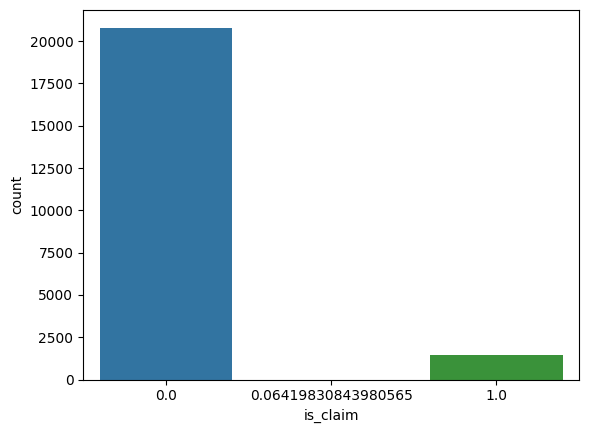

In [ ]:
# Viewing Target Varaible Distribution:
sns.countplot(x= df['is_claim'], data=df)

In [ ]:
# dropping the policyid column
data1 = df
data1= data1.drop('policy_id', axis=1)
data1

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0.0000,0.000000
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0.0000,0.000000
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0.0000,0.000000
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2.0000,0.000000
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22224,0.045510,0.14,0.403846,C8,8794,1,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.0000,0.000000
22225,0.483000,0.02,0.326923,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0.0000,0.000000
22226,1.032447,0.08,0.528846,C11,6108,3,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3.0000,0.000000
22227,0.316130,0.04,0.461538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0.0000,1.000000


In [ ]:
df['gear_box'].value_counts()

5.000000    16810
6.000000     5418
5.243747        1
Name: gear_box, dtype: int64

In [ ]:
df.is_claim.value_counts()

0.000000    20801
1.000000     1427
0.064198        1
Name: is_claim, dtype: int64

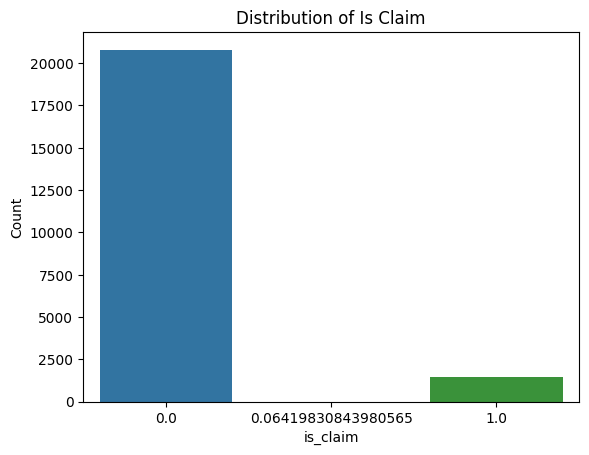

In [ ]:
# Countplot
sns.countplot(x='is_claim', data=df)
plt.xlabel('is_claim')
plt.ylabel('Count')
plt.title('Distribution of Is Claim')
plt.show()

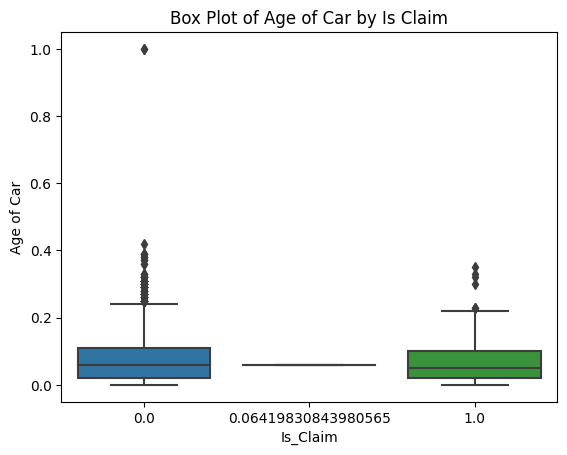

In [ ]:
# Box plot
sns.boxplot(x='is_claim', y='age_of_car', data=df)
plt.xlabel('Is_Claim')
plt.ylabel('Age of Car')
plt.title('Box Plot of Age of Car by Is Claim')
plt.show()

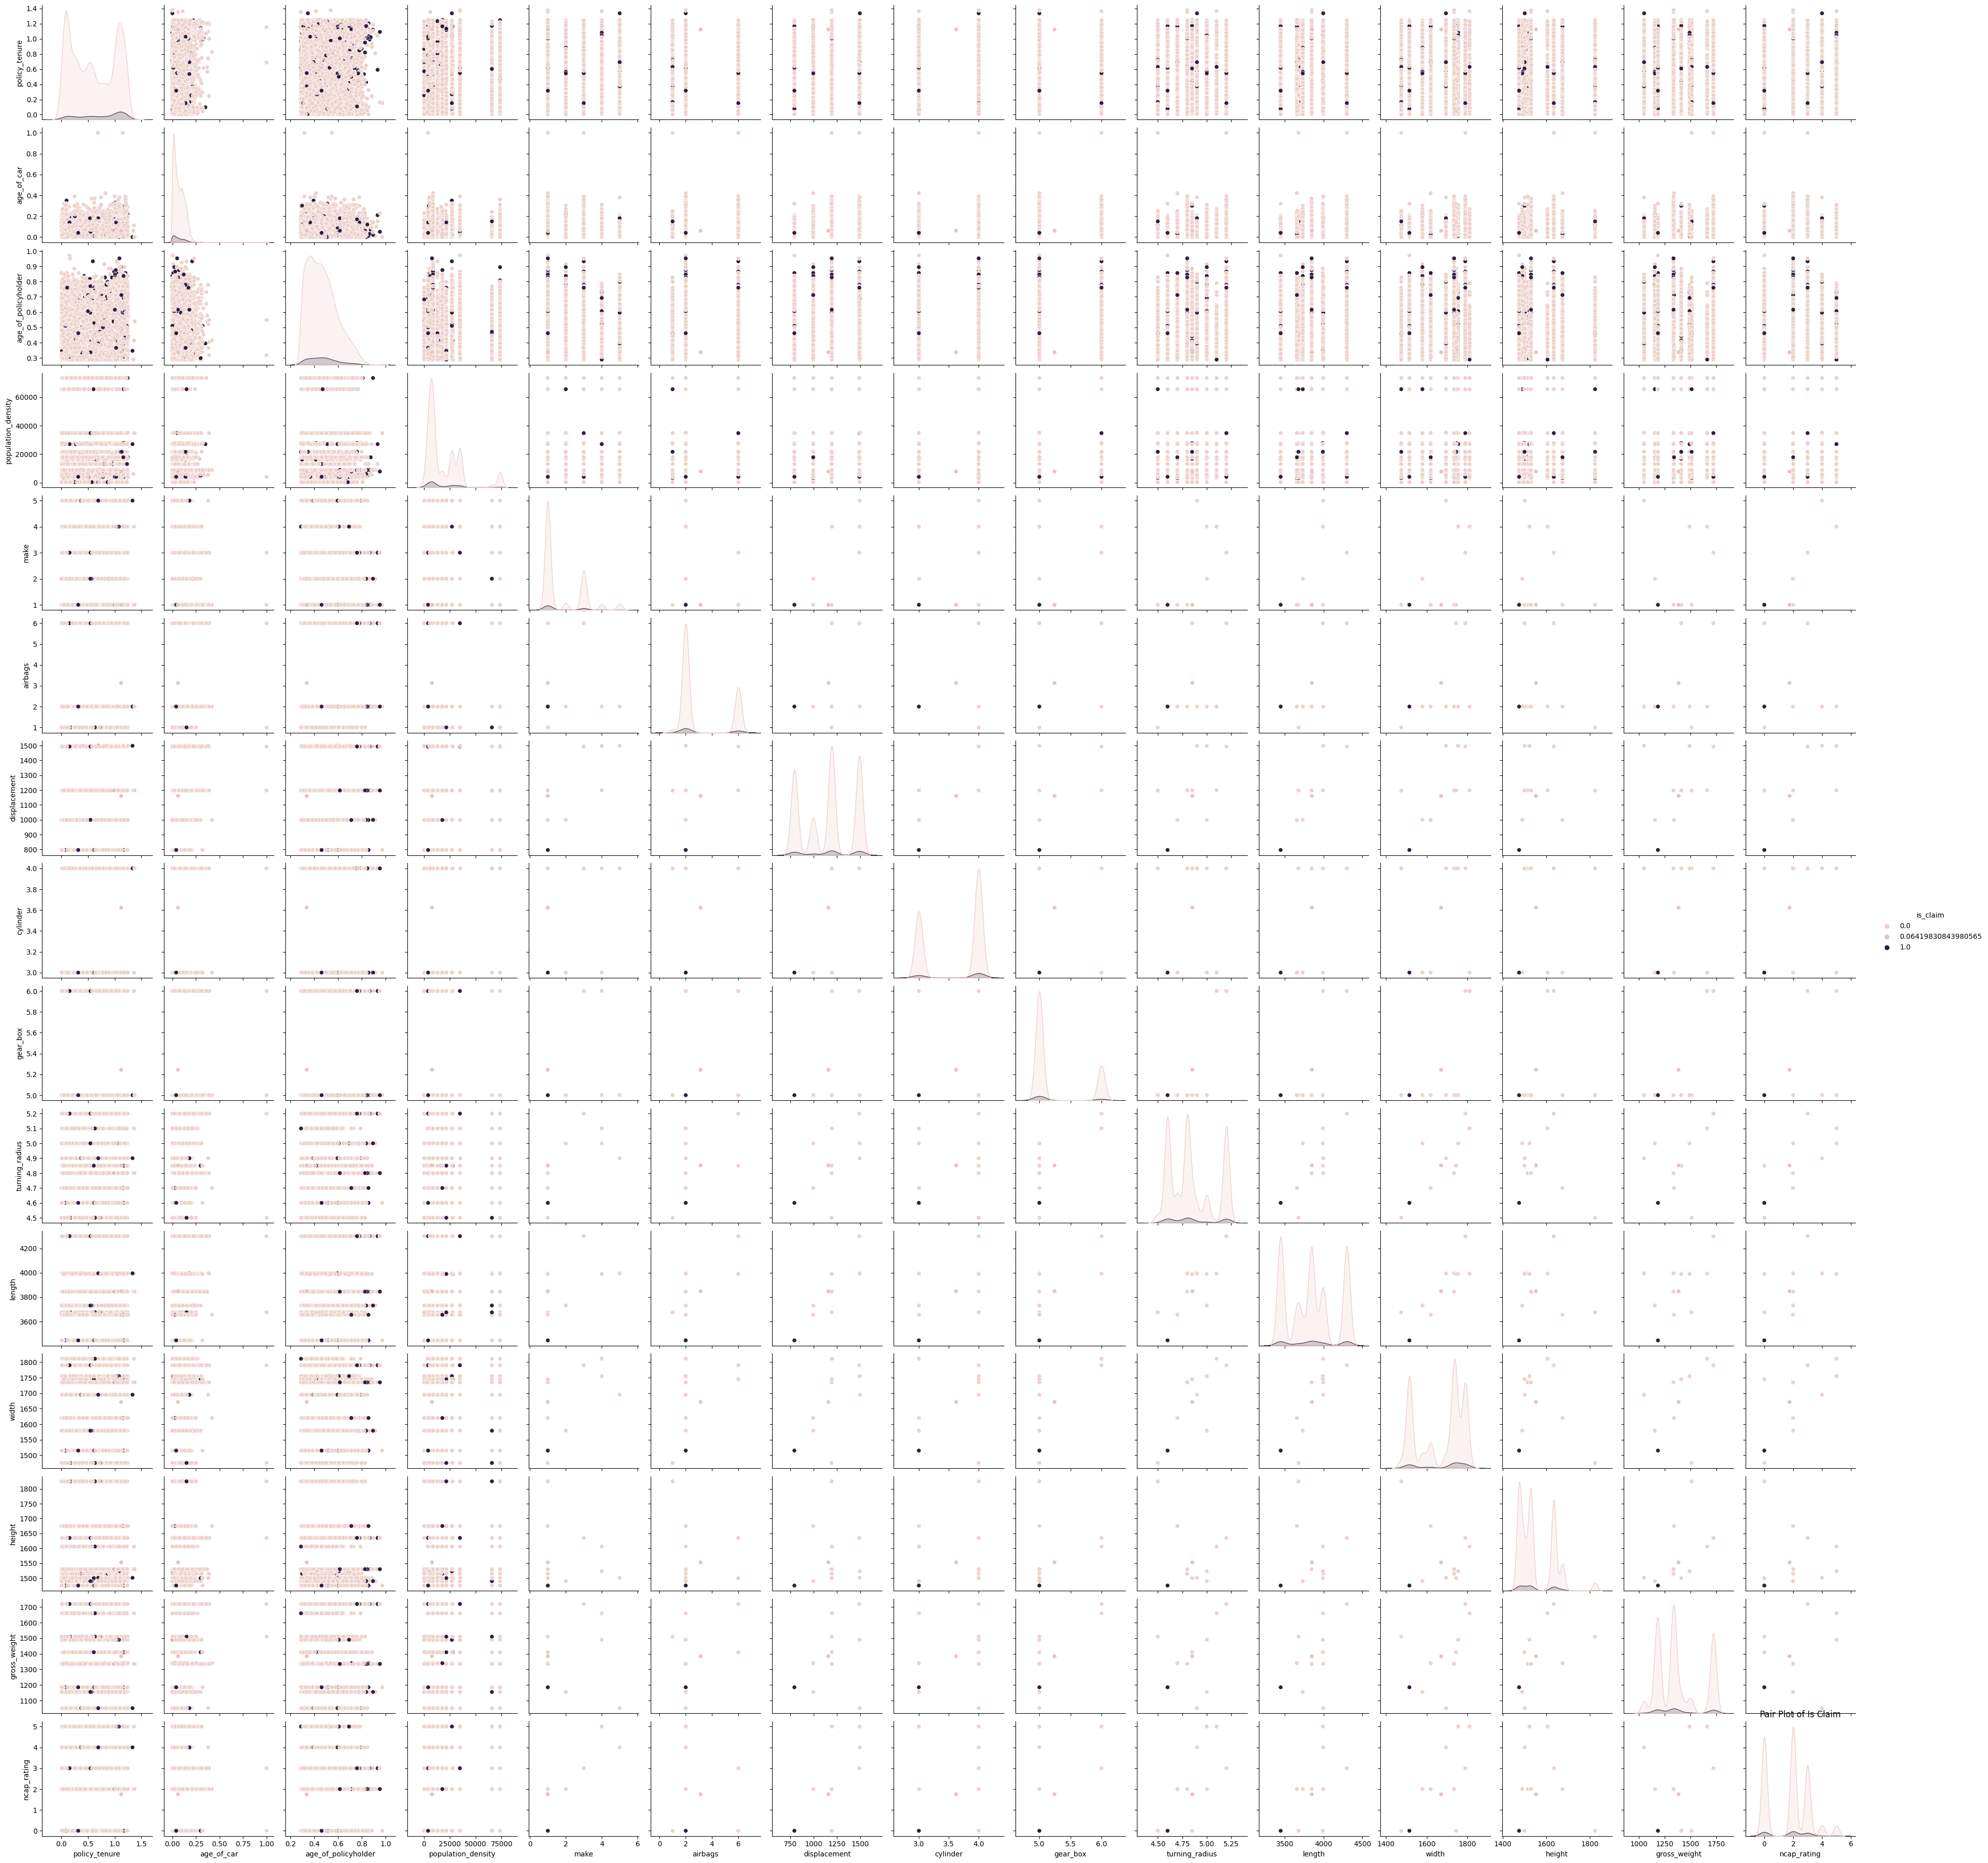

In [ ]:
# Pair plot
sns.pairplot(df, hue='is_claim')
plt.title('Pair Plot of Is Claim')
plt.show()

Checking correlation between numerical columns

In [ ]:
df.corr()

<ipython-input-64-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
policy_tenure,1.000000,0.166312,0.143676,-0.100307,0.086101,0.103981,0.194361,0.191185,0.095305,0.166426,0.190869,0.213228,0.119055,0.141027,0.173280,0.078747
age_of_car,0.166312,1.000000,-0.035427,-0.062255,0.188122,0.209073,0.393208,0.379522,0.201579,0.332716,0.383177,0.414104,0.259156,0.302127,0.348853,-0.028172
age_of_policyholder,0.143676,-0.035427,1.000000,0.009669,-0.031989,-0.008041,-0.023764,0.004183,-0.003115,-0.016764,-0.020138,-0.006135,-0.053930,-0.007758,-0.031628,0.022435
population_density,-0.100307,-0.062255,0.009669,1.000000,-0.035125,-0.060359,-0.090983,-0.091591,-0.056640,-0.077501,-0.091968,-0.098156,-0.065583,-0.077816,-0.071150,-0.017808
make,0.086101,0.188122,-0.031989,-0.035125,1.000000,0.501800,0.753344,0.410672,0.632807,0.753861,0.692365,0.511695,0.303274,0.481408,0.792254,-0.000456
airbags,0.103981,0.209073,-0.008041,-0.060359,0.501800,1.000000,0.661190,0.478594,0.859556,0.810820,0.809094,0.639562,0.423816,0.828988,0.341557,0.002789
displacement,0.194361,0.393208,-0.023764,-0.090983,0.753344,0.661190,1.000000,0.866231,0.692240,0.875407,0.961655,0.899302,0.554591,0.776210,0.847065,0.007678
cylinder,0.191185,0.379522,0.004183,-0.091591,0.410672,0.478594,0.866231,1.000000,0.410163,0.615806,0.805476,0.862430,0.352118,0.602978,0.598364,0.013434
gear_box,0.095305,0.201579,-0.003115,-0.056640,0.632807,0.859556,0.692240,0.410163,1.000000,0.861740,0.808975,0.601923,0.579725,0.894639,0.529688,-0.000635
turning_radius,0.166426,0.332716,-0.016764,-0.077501,0.753861,0.810820,0.875407,0.615806,0.861740,1.000000,0.944899,0.825603,0.460436,0.823097,0.779302,0.002724


<ipython-input-65-e4bc4c007299>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


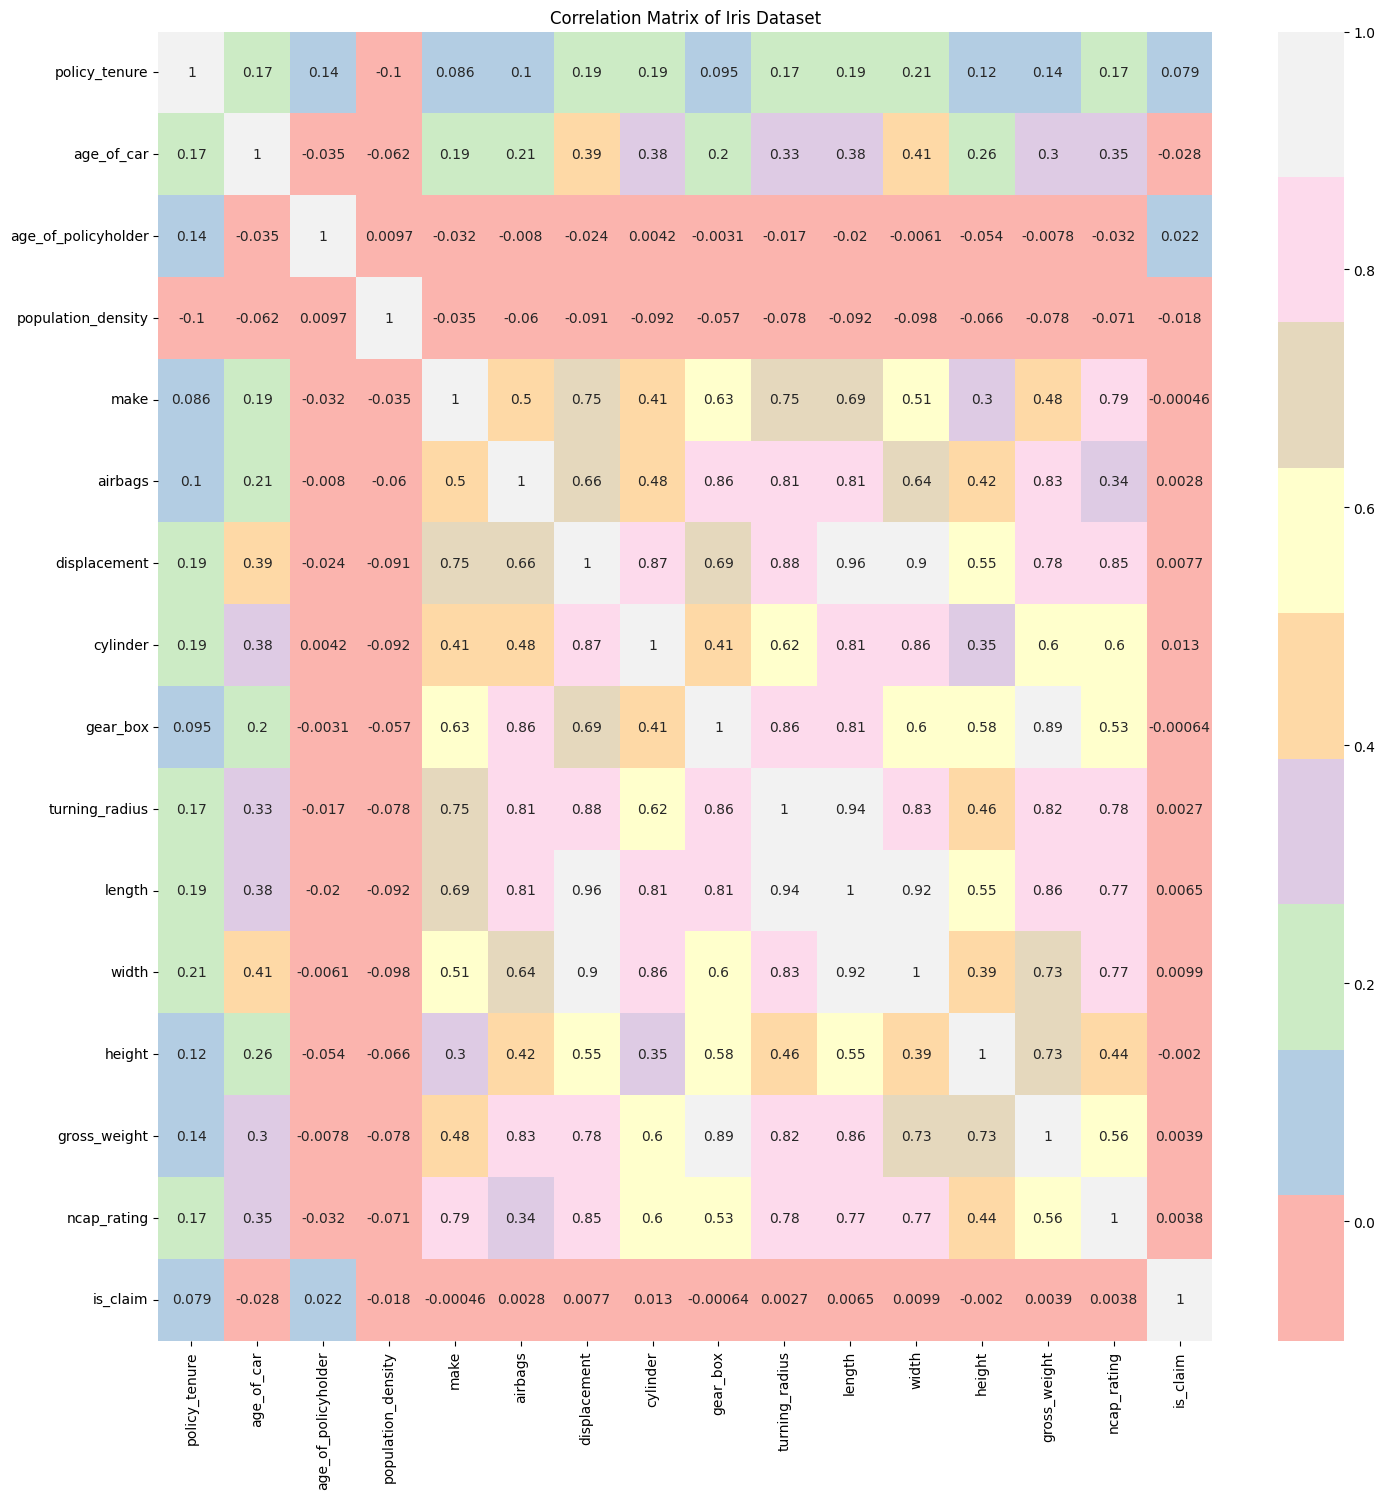

In [ ]:
# Correlation heatmap

correlation_matrix = df.corr()
plt.figure(figsize = (17,17))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1')
plt.title('Correlation Matrix of Iris Dataset')
plt.show()


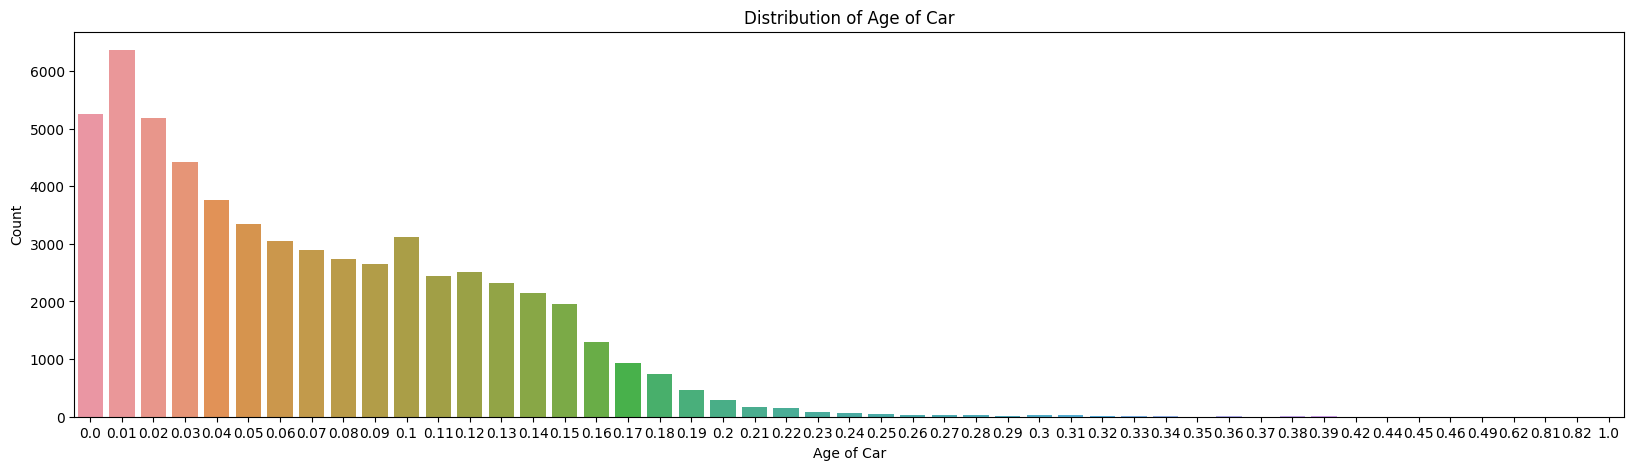

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(x='age_of_car', data=df)
plt.xlabel('Age of Car')
plt.ylabel('Count')
plt.title('Distribution of Age of Car')
plt.show()

In [ ]:
df['is_claim'].unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64>

In [ ]:
# Extracting categorical columns:
categorical_columns = df.select_dtypes(include=['object'])

## Extracting All Features:
features = [col for col in data1.columns if col not in ['is_claim']]
print(features)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']


In [ ]:
# Spliting Features and Target Variable:
X, y = data1.loc[:, features], data1.loc[:, 'is_claim']
# Checking Dataset Shape (Features):
print(X.shape)

(22229, 42)


In [ ]:
X

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0000
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0000
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0000
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2.0000
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22224,0.045510,0.14,0.403846,C8,8794,1,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.0000
22225,0.483000,0.02,0.326923,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0000
22226,1.032447,0.08,0.528846,C11,6108,3,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3.0000
22227,0.316130,0.04,0.461538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0000


In [ ]:
y

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
22224    0.000000
22225    0.000000
22226    0.000000
22227    1.000000
22228    0.064198
Name: is_claim, Length: 22229, dtype: float64

In [ ]:
categorical_columns

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,ID00001,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,ID00002,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,ID00003,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,ID00004,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,ID00005,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,C8,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,ID58589,C14,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58589,ID58590,C5,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58590,ID58591,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Data
labelEncode = LabelEncoder()

# Iterating Over each categorial features:
for col in categorical_columns:
    # storing its numerical value:
    X[col] = labelEncode.fit_transform(data1[col])

KeyError: ignored

In [ ]:
X

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0000
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0000
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0000
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2.0000
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22224,0.045510,0.14,0.403846,C8,8794,1,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.0000
22225,0.483000,0.02,0.326923,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0000
22226,1.032447,0.08,0.528846,C11,6108,3,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3.0000
22227,0.316130,0.04,0.461538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0000
